<a href="https://colab.research.google.com/github/anshudhanshu/Startups-Funding-Prediction/blob/main/Sudhanshu_Rawat_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
!pip install modin

In [ ]:
!pip install modin[all] # Install all of the above

In [1]:
import numpy as np
import pandas as pd
# import os
# os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
# import modin.pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading Dataset**

In [ ]:
%%time
startups =pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/data_driven_investment_0.csv')

CPU times: user 3.09 s, sys: 499 ms, total: 3.59 s
Wall time: 5.77 s


In [ ]:
startups.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


### **Understanding Data**

In [ ]:
startups.shape

(1502285, 20)

* There are more than 1.5 milion observations in this dataset.
* There are 20 columns

In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502285 entries, 0 to 1502284
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500803 non-null  object 
 1   month                 1502285 non-null  int64  
 2   Application Category  1502285 non-null  object 
 3   Avg_Session_Time      877763 non-null   float64
 4   Business Models       2750 non-null     object 
 5   City                  2743 non-null     object 
 6   Company Stage         2750 non-null     object 
 7   Feed Name             2750 non-null     object 
 8   Founded Year          2750 non-null     float64
 9   Latest Funded Date    2750 non-null     object 
 10  MAU                   118092 non-null   float64
 11  Open_Rate             877746 non-null   float64
 12  Overview              2750 non-null     object 
 13  Practice Areas        2750 non-null     object 
 14  Reach                 1050970 non-

In [ ]:
startups.isnull().sum()

UUID                       1482
month                         0
Application Category          0
Avg_Session_Time         624522
Business Models         1499535
City                    1499542
Company Stage           1499535
Feed Name               1499535
Founded Year            1499535
Latest Funded Date      1499535
MAU                     1384193
Open_Rate                624539
Overview                1499535
Practice Areas          1499535
Reach                    451315
Region                        0
Total Funding (USD)     1499759
Total_Session_Time       624589
Uninstall_Rate          1150001
funding_ind                   0
dtype: int64

* We can see that there are many missing values in this dataset.


In [ ]:
startups.describe()

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
count,1.502285e+06,877763.000000,2750.000000,118092.000000,877746.000000,1.050970e+06,2.526000e+03,877696.000000,352284.000000,1.502285e+06
mean,2.019719e+07,1.623398,2014.632000,0.398440,3.940700,1.068854e-03,1.270335e+08,5.963753,0.144642,1.830545e-03
std,5.532754e+03,2.253496,4.000254,0.208611,4.537303,1.692271e-02,4.955262e+08,9.593728,0.130946,4.274570e-02
min,2.018070e+07,0.000033,1983.000000,0.000019,1.000000,0.000000e+00,6.200000e+01,0.000033,0.000000,0.000000e+00
25%,2.019120e+07,0.417683,2014.000000,0.235294,1.875000,3.022203e-07,2.014807e+06,1.085491,0.056637,0.000000e+00
50%,2.020030e+07,0.889806,2015.000000,0.388791,2.933333,5.137744e-06,9.973513e+06,2.726576,0.107383,0.000000e+00
75%,2.020040e+07,1.917254,2017.000000,0.546220,4.500000,7.543001e-05,4.187457e+07,6.614369,0.190809,0.000000e+00
max,2.020060e+07,58.561333,2020.000000,1.000000,80.000000,9.990408e-01,7.201430e+09,149.983317,1.000000,1.000000e+00


In [ ]:
startups.describe(include='object')

,UUID,Application Category,Business Models,City,Company Stage,Feed Name,Latest Funded Date,Overview,Practice Areas,Region
count,1500803,1502285,2750,2743,2750,2750,2750,2750,2750,1502285
unique,147741,48,317,31,13,189,251,350,138,1
top,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,Education,Social Platforms > Interest Based > Education ...,Bangalore,Seed,Social Platforms\nTest Preparation Tech,2020-09-25,Q&A-based education community,FinTech,National
freq,2671,202603,232,781,1251,233,232,232,359,1502285


In [ ]:
# not_null_avg_time_df=startups[~startups['Avg_Session_Time'].isnull()]
# not_null_avg_time_df.shape
# not_null_df = startups.dropna()
# not_null_df.shape
# startups[startups['Company Stage']== 'Series A']['Avg_Session_Time'].median()
# startups[startups['Company Stage']== 'Series B']['Avg_Session_Time'].median()
# startups[startups['Company Stage']== 'Series C']['Avg_Session_Time'].median()

In [ ]:
startups.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year',
       'Latest Funded Date', 'MAU', 'Open_Rate', 'Overview', 'Practice Areas',
       'Reach', 'Region', 'Total Funding (USD)', 'Total_Session_Time',
       'Uninstall_Rate', 'funding_ind'],
      dtype='object')

##### **Let us check for Mean average session time an Midean Avg_session time**

In [ ]:
# Median Avg_Session_Time for each Company Stage
print("Company_Stage  Median Avg_Session_Time")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Avg_Session_Time'].median())
  print()

Company_Stage  Median Avg_Session_Time
Series A:	0.8452855929031058

Seed:	1.1466028996847815

Series B:	1.1597418680543208

Series D:	1.1877597818775476

Series C:	0.9566043956228956

Series H:	1.0398141319678857

Acquired:	1.359713622404322

Series J:	nan

Series E:	2.257690865591402

Series I:	0.6084284571679509

Series F:	1.3817414865250521

Funded:	4.015873104070217

Series G:	1.0485492057541907



In [ ]:
# Mean Avg_Session_Time for each Company Stage
print("Company_Stage  Mean Avg_Session_Time")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Avg_Session_Time'].mean())
  print()

Company_Stage  Mean Avg_Session_Time
Series A:	1.3716280934024514

Seed:	1.87132003701909

Series B:	2.1865301918938616

Series D:	1.5445236571738787

Series C:	1.566963894546688

Series H:	1.0699148538314946

Acquired:	1.4737326445464154

Series J:	nan

Series E:	1.5992154684920021

Series I:	0.6347854630185972

Series F:	1.347736590610043

Funded:	4.073137388757522

Series G:	1.067974072279323



In [ ]:
# Median Uninstall Rate for each Company Stage
print("Company_Stage  Mean Uninstall Rate")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Uninstall_Rate'].median())
  print()

Company_Stage  Mean Uninstall Rate
Series A:	0.12569832402234635

Seed:	0.12335299630630134

Series B:	0.12108472543107551

Series D:	0.11162735287109836

Series C:	0.1311475409836066

Series H:	0.11724137931034485

Acquired:	0.10476190476190472

Series J:	0.07699154428126387

Series E:	0.09417539806946618

Series I:	0.09819979108918059

Series F:	0.10332950631458092

Funded:	0.07275132275132273

Series G:	0.0650521656998872



In [ ]:
# Mean Uninstall Rate for each Company Stage
print("Company_Stage  Mean Uninstall Rate")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Uninstall_Rate'].mean())
  print()

Company_Stage  Mean Uninstall Rate
Series A:	0.13603426038798164

Seed:	0.15612784639131766

Series B:	0.1792365939546728

Series D:	0.12469005848941926

Series C:	0.14414882574361904

Series H:	0.10950911243866461

Acquired:	0.12213158231566766

Series J:	0.08320118129035962

Series E:	0.09792365921542732

Series I:	0.0952301291732481

Series F:	0.1615591730296482

Funded:	0.07275132275132273

Series G:	0.08537016811071932



In [ ]:
categories = startups['Application Category'].unique()

In [ ]:
Stages = startups['Company Stage'].unique()

### **Analysing UUID**

In [ ]:
startups['UUID'].describe()

count                                      1500803
unique                                      147741
top       4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27
freq                                          2671
Name: UUID, dtype: object

In [ ]:
startups['UUID'].isnull().sum()

1482

In [ ]:
startups[startups['UUID'].isnull()].isnull().sum()

UUID                    1482
month                      0
Application Category       0
Avg_Session_Time         816
Business Models         1482
City                    1482
Company Stage           1482
Feed Name               1482
Founded Year            1482
Latest Funded Date      1482
MAU                     1424
Open_Rate                816
Overview                1482
Practice Areas          1482
Reach                    382
Region                     0
Total Funding (USD)     1482
Total_Session_Time       816
Uninstall_Rate          1298
funding_ind                0
dtype: int64

In [ ]:
startups[~startups['UUID'].isnull()].isnull().sum()

UUID                          0
month                         0
Application Category          0
Avg_Session_Time         623706
Business Models         1498053
City                    1498060
Company Stage           1498053
Feed Name               1498053
Founded Year            1498053
Latest Funded Date      1498053
MAU                     1382769
Open_Rate                623723
Overview                1498053
Practice Areas          1498053
Reach                    450933
Region                        0
Total Funding (USD)     1498277
Total_Session_Time       623773
Uninstall_Rate          1148703
funding_ind                   0
dtype: int64

In [ ]:
startups['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
                                            ... 
16a36e58ed132ab3bd2cd01d6249d6b1b7db3d21       1
9834a8a858760e64f5195b60e1a807ec1f16e3f2       1
bb464bf3eb09eeefd201dabc972a15e923007a61       1
c4dfb1bd10b116bfce0ca2368d268a17cea52b90       1
333fddf6f8a96b356912af8ca55e94f35596d802       1
Name: UUID, Length: 147741, dtype: int64

In [ ]:
startups['Company Stage'].unique()

array([nan, 'Series A', 'Seed', 'Series B', 'Series D', 'Series C',
       'Series H', 'Acquired', 'Series J', 'Series E', 'Series I',
       'Series F', 'Funded', 'Series G'], dtype=object)

In [ ]:
startups[startups['Company Stage']  == 'Series A' ].dropna()['Total Funding (USD)']

30713       5588693.0
32144       6483790.0
32898      10422240.0
32977      19022522.0
35416      14996449.0
              ...    
1418498    12331649.0
1418499    12331649.0
1418500    12331649.0
1419670    11544081.0
1421441    12331649.0
Name: Total Funding (USD), Length: 79, dtype: float64

In [ ]:
startups[startups['Company Stage']  == 'Series A' ]['Total Funding (USD)'].mean()

15556360.92204301

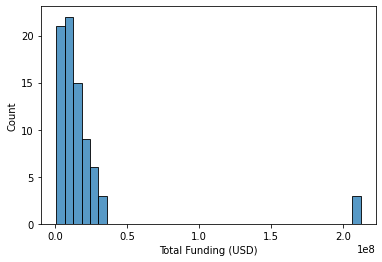

In [ ]:
sns.histplot(startups[startups['Company Stage']  == 'Series A' ].dropna()['Total Funding (USD)'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


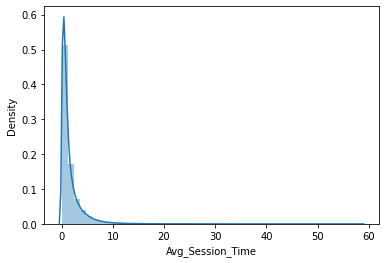

In [ ]:
sns.distplot(not_null_avg_time_df.Avg_Session_Time)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


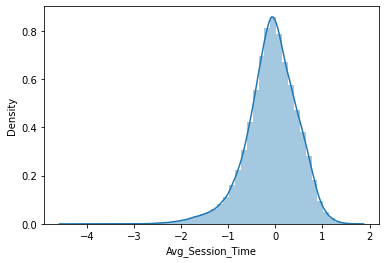

In [ ]:
sns.distplot(np.log10(not_null_avg_time_df.Avg_Session_Time))

In [ ]:
null_avg_time = startups[startups['Avg_Session_Time'].isnull()]
null_avg_time.head(30)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0
5,3d82666e19078799205cee6998a6c5dd8b6add2a,20180801,Travel & Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000927,National,NaN,NaN,0.094488,0
6,7dd8f8918e91940bb6f8af0b4889fedaf421d0db,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000280,National,NaN,NaN,0.096774,0
7,029c8ea1565578af1d3a79dfd186ad6e590ce362,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000514,National,NaN,NaN,0.134831,0
8,08a19c746c758161bc0436f74163f5e206dad50b,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000021,National,NaN,NaN,0.000000,0
9,0d30ce53c1f76f5ee21425b461ebf28e82728505,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000260,National,NaN,NaN,0.114754,0


In [ ]:
null_avg_time.shape

(624522, 20)

In [ ]:
null_avg_time.isnull().sum()

UUID                       816
month                        0
Application Category         0
Avg_Session_Time        624522
Business Models         623464
City                    623467
Company Stage           623464
Feed Name               623464
Founded Year            623464
Latest Funded Date      623464
MAU                     624481
Open_Rate               624460
Overview                623464
Practice Areas          623464
Reach                      113
Region                       0
Total Funding (USD)     623595
Total_Session_Time      624483
Uninstall_Rate          384661
funding_ind                  0
dtype: int64

In [ ]:
null_avg_time['funding_ind'].value_counts()

0    623464
1      1058
Name: funding_ind, dtype: int64

UUID

  ['c1ad38e2d357610c129657d870ede902e8abfcb9'
 'd841e670d9191f896a0cbc75961920887b375756'
 '0a59d138b3eaccd22b665eae70c756fef83ddb63' ...
 'edcbe5f1ad6b3c0400e60d38a07a5cdaabc4b1a8'
 'e9f9a92b05dbb720db6d49a85b2ed243fe373ccd'
 '6495e1a3ddf8ac88f119ba60eb5880da263d588c']
month

  [20180801 20190601 20191201 20200301 20190201 20200201 20190301 20200601
 20180901 20190701 20181201 20190801 20190901 20180701 20181001 20181101
 20191001 20200101 20200501 20190401 20200401 20190501 20191101 20190101]
Application Category

  ['Books & Reference' 'Finance' 'Productivity' 'Travel & Local' 'Education'
 'Health & Fitness' 'Lifestyle' 'Music & Audio' 'Medical' 'Business'
 'Maps & Navigation' 'Social' 'Shopping' 'Tools' 'Puzzle' 'Adventure'
 'Sports' 'Casual' 'Food & Drink' 'Art & Design' 'Entertainment' 'Card'
 'Racing' 'Photography' 'Board' 'Role Playing' 'Action' 'Simulation'
 'Strategy' 'Educational' 'News & Magazines' 'Video Players & Editors'
 'Personalization' 'Weather' 'Communication'

### **Data Cleaning**

checking for duplicated and dropping them.

In [ ]:
startups.duplicated().sum()

89460

In [ ]:
# dropping ALL duplicte values 
new_df = startups.drop_duplicates()
new_df.shape 

(1412825, 20)

In [ ]:
total_features = list(new_df.columns)
total_features

['UUID',
 'month',
 'Application Category',
 'Avg_Session_Time',
 'Business Models',
 'City',
 'Company Stage',
 'Feed Name',
 'Founded Year',
 'Latest Funded Date',
 'MAU',
 'Open_Rate',
 'Overview',
 'Practice Areas',
 'Reach',
 'Region',
 'Total Funding (USD)',
 'Total_Session_Time',
 'Uninstall_Rate',
 'funding_ind']

* Since there are some features that are available only if the startup has been funded. So we will be not using those  features in our analysis and model building now and remove them from the dataset.

In [ ]:
usable_features = ['UUID',
 'month',
 'Application Category',
 'Avg_Session_Time',
 'Open_Rate',
 'Reach',
 'Total_Session_Time',
 'funding_ind']

In [ ]:
clf_df = new_df[usable_features]

In [ ]:
clf_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,0.042963,NaN,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,0.003244,NaN,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,0.000161,NaN,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,0.000077,NaN,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,0.000939,NaN,0


Checking for null values

In [ ]:
clf_df.isnull().sum()

UUID                       969
month                        0
Application Category         0
Avg_Session_Time        535062
Open_Rate               535079
Reach                   451315
Total_Session_Time      535129
funding_ind                  0
dtype: int64

* We see still there are many missing values and we need to impute them.

**Now let us visualize the if there is any pattern in the missing values.**

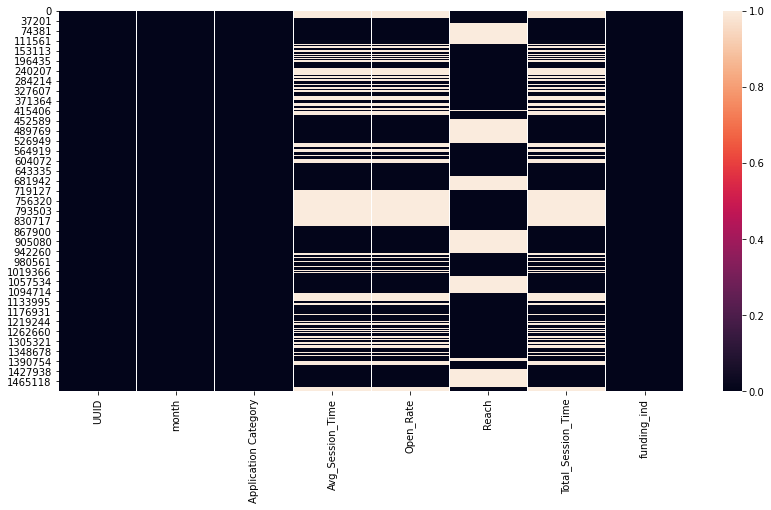

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(clf_df.isnull())

In [ ]:
clf_df[clf_df['funding_ind'] == 1].UUID.isnull().sum()

0

In [ ]:
clf_df[clf_df['funding_ind'] == 0].UUID.isnull().sum()

969

In [ ]:
clf_df =clf_df[~clf_df['UUID'].isnull()] 

In [ ]:
clf_df[clf_df['funding_ind'] == 0].UUID.isnull().sum()

0

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

In [ ]:
def changeTodate(x):
  month = str(x)[4:6]
  day = str(x)[6:]
  year = str(x)[0:4]
  date = day+'/'+month+'/'+year
  return int(day),int(month),int(year),date
  # return pd.to_datetime(date,format='dd/mm/yy')


In [ ]:
clf_df['observed day'] = clf_df['month'].apply(lambda x:changeTodate(x)[0])
clf_df['observed month'] = clf_df['month'].apply(lambda x: changeTodate(x)[1])
clf_df['observed year'] = clf_df['month'].apply(lambda x: changeTodate(x)[2])

**Now let us impute the missing values**

In [ ]:
def fill_missing(dataframe):
  new_data = pd.DataFrame(columns=dataframe.columns)
  Category_list = dataframe['Application Category'].value_counts().index.to_list()
  years = dataframe['observed year'].value_counts().index.to_list()
  for i in Category_list:
    temp = dataframe[dataframe['Application Category']==i]
    for y in years:
      temp1 = temp[temp['observed year']==y]
      temp1.fillna(method='ffill', limit = 2, inplace = True)
      temp1.fillna(method='backfill', limit = 1, inplace = True)
      new_data = pd.concat([new_data, temp1])
  
  new_data_1 = pd.DataFrame(columns=dataframe.columns)
  for i in Category_list:
    temp = new_data[new_data['Application Category']==i]
    for y in years:
      temp1 = temp[temp['observed year']==y]
      temp1.fillna(temp1.mean(), inplace = True)
      new_data_1 = pd.concat([new_data_1, temp1])

  Final_data = pd.DataFrame(columns=dataframe.columns)  
  for i in Category_list:
    temp = new_data_1[new_data_1['Application Category']==i]
    temp.fillna(temp.mean(), inplace = True)
    Final_data = pd.concat([Final_data, temp])

  return Final_data

In [ ]:
final_df = fill_missing(clf_df)

In [ ]:
final_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed day,observed month,observed year
125726,615ff89844fb9b8804559eedab5f13f569b8c63c,20200301,Education,0.799037,3.571429,9.860441e-06,3.285362,0,1,3,2020
125731,4096f9f35c2efe32751614b5de6ca4966d770b41,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
125760,ea1d85c85770124a6ec1904843f066a3a7d09b0a,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
125771,c495446fe78d349ba3a51b12029d4343e4ed8001,20200301,Education,1.504116,3.131962,1.972088e-07,4.991207,0,1,3,2020
125776,caf0ec13bb28fc975d5c3a1fabed988c753c7af2,20200301,Education,1.504116,3.131962,1.972088e-07,4.991207,0,1,3,2020


In [ ]:
final_df.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/cleaned_data.csv',index=False)

In [ ]:
cleaned_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/cleaned_data.csv')
cleaned_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed day,observed month,observed year
0,615ff89844fb9b8804559eedab5f13f569b8c63c,20200301,Education,0.799037,3.571429,9.860441e-06,3.285362,0,1,3,2020
1,4096f9f35c2efe32751614b5de6ca4966d770b41,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
2,ea1d85c85770124a6ec1904843f066a3a7d09b0a,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
3,c495446fe78d349ba3a51b12029d4343e4ed8001,20200301,Education,1.504116,3.131962,1.972088e-07,4.991207,0,1,3,2020
4,caf0ec13bb28fc975d5c3a1fabed988c753c7af2,20200301,Education,1.504116,3.131962,1.972088e-07,4.991207,0,1,3,2020


In [ ]:
cleaned_df.drop(['observed day'],axis=1,inplace=True)

In [ ]:
cleaned_df.isna().sum()

UUID                    0
month                   0
Application Category    0
Avg_Session_Time        0
Open_Rate               0
Reach                   0
Total_Session_Time      0
funding_ind             0
observed month          0
observed year           0
dtype: int64

In [ ]:
month_wise_df= cleaned_df.groupby(['UUID','Application Category','observed month','observed year']).first().reset_index()
month_wise_df.head()

,UUID,Application Category,observed month,observed year,month,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
0,000066f130e3b972364c505c805e2cddee68816d,Business,3,2020,20200301,0.770633,3.322581,1.972088e-07,2.770216,0
1,000066f130e3b972364c505c805e2cddee68816d,Business,4,2020,20200401,1.422606,1.666667,3.022203e-07,2.793617,0
2,000066f130e3b972364c505c805e2cddee68816d,Business,6,2020,20200601,1.106979,4.333333,4.889378e-06,2.576717,0
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,4,2020,20200401,0.595371,6.166667,3.022203e-07,3.845703,0
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2,2020,20200201,1.471044,3.000000,9.665592e-04,4.413133,0


**We remove the those observations that has been appeared less than 4 time in the dataset because we want to predict the outpout for three months**

In [ ]:
UUID_value_count_df = month_wise_df.UUID.value_counts().reset_index()
UUID_value_count_df = UUID_value_count_df.rename(columns={'index':'UUID','UUID':'value_counts'})
id = UUID_value_count_df[(UUID_value_count_df['value_counts']< 4)].UUID

# indx

In [ ]:
temp = month_wise_df.set_index('UUID')

In [ ]:
temp.head()




,Application Category,observed month,observed year,month,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
UUID,,,,,,,,,
000066f130e3b972364c505c805e2cddee68816d,Business,3,2020,20200301,0.770633,3.322581,1.972088e-07,2.770216,0
000066f130e3b972364c505c805e2cddee68816d,Business,4,2020,20200401,1.422606,1.666667,3.022203e-07,2.793617,0
000066f130e3b972364c505c805e2cddee68816d,Business,6,2020,20200601,1.106979,4.333333,4.889378e-06,2.576717,0
0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,4,2020,20200401,0.595371,6.166667,3.022203e-07,3.845703,0
0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2,2020,20200201,1.471044,3.000000,9.665592e-04,4.413133,0


In [ ]:
temp.loc['000066f130e3b972364c505c805e2cddee68816d']

,Application Category,observed month,observed year,month,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
UUID,,,,,,,,,
000066f130e3b972364c505c805e2cddee68816d,Business,3,2020,20200301,0.770633,3.322581,1.972088e-07,2.770216,0
000066f130e3b972364c505c805e2cddee68816d,Business,4,2020,20200401,1.422606,1.666667,3.022203e-07,2.793617,0
000066f130e3b972364c505c805e2cddee68816d,Business,6,2020,20200601,1.106979,4.333333,4.889378e-06,2.576717,0


In [ ]:
new_df = temp.drop(id)


In [ ]:
new_df = new_df.reset_index()

In [ ]:
new_df.funding_ind.value_counts()

0    807545
1      1454
Name: funding_ind, dtype: int64

In [ ]:
# month_wise_df.funding_ind.value_counts()

In [ ]:
# new_df[new_df['funding_ind']==1]

In [ ]:
# new_df[new_df['funding_ind']==0]

In [ ]:
# temp = new_df.set_index('Application Category')
# temp.head()

In [ ]:
never_funded_index = []
def check_funded_cat(x):
  if x in not_funded_cat:

    never_funded_index.append(list(new_df[new_df['Application Category']==x].index))

In [ ]:

new_df['Application Category'].apply(check_funded_cat)

0         None
1         None
2         None
3         None
4         None
          ... 
808994    None
808995    None
808996    None
808997    None
808998    None
Name: Application Category, Length: 808999, dtype: object

In [ ]:
 never_funded_index = np.unique(np.array(never_funded_index))

In [ ]:
# for i in range(7):

#   print(len(never_funded_index[i]))

In [ ]:
for i in range(7):
  new_df.drop(never_funded_index[i],inplace=True)

In [ ]:
# new_df[['Application Category', 'Avg_Session_Time']].groupby('Application Category').mean()

In [ ]:
new_df.funding_ind.value_counts()

0    789408
1      1454
Name: funding_ind, dtype: int64

### **EDA**

In [ ]:
# temp_df = new_df.groupby(['UUID','Application Category','observed year']).agg({'observed month':'count','funding_ind':'first'}).reset_index()
# temp_df = temp_df.rename(columns={'observed month':'count_of_months'})
# temp_df
# # temp_df[(temp_df['funding_ind']==1) &(temp_df['observed year'] ==2020)].UUID.value_counts()

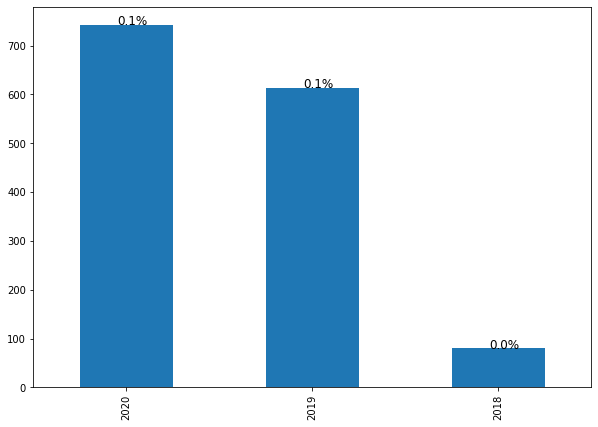

In [ ]:
#Trend of recieving funds
fig, ax = plt.subplots(figsize =(10, 7))
ax = new_df[new_df['funding_ind']==1]['observed year'].value_counts().plot(kind='bar')
perc_on_bar(ax,new_df["observed year"])

In [ ]:
new_df.funding_ind.value_counts()

0    867491
1      1435
Name: funding_ind, dtype: int64

Text(0.5, 1.0, 'Top 10 categories')

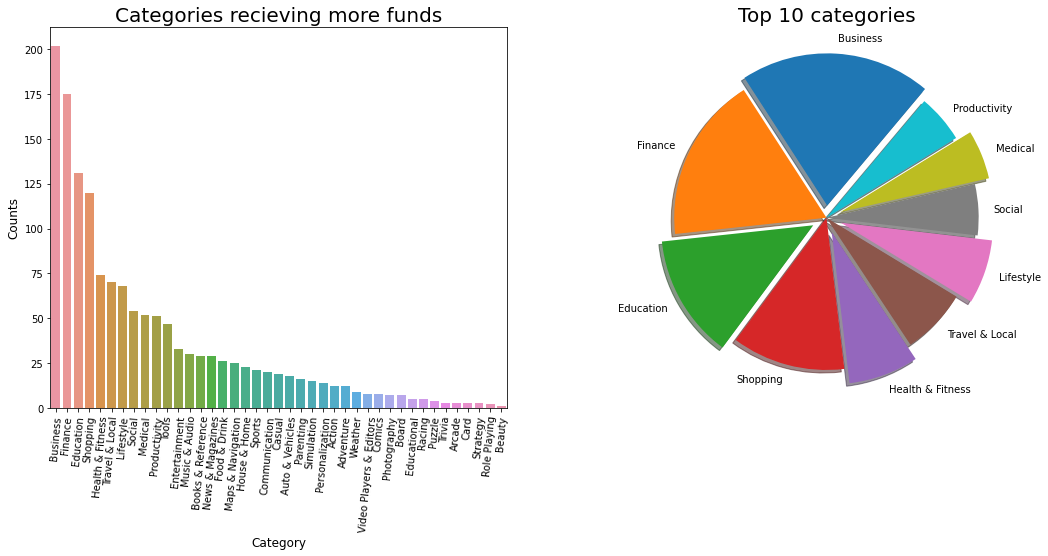

In [ ]:
# Category recieving more funds
plt.rcParams['figure.figsize'] = (18, 7)

Funded_cat_df = pd.DataFrame(new_df[new_df['funding_ind']==1]['Application Category'].value_counts())
ax1 = plt.subplot(121)
sns.barplot(x=Funded_cat_df.index, y= Funded_cat_df['Application Category'] )
plt.xlabel('Category', fontsize = 12)
plt.xticks(rotation=85)
plt.ylabel('Counts', fontsize = 12)
ax1.set_title('Categories recieving more funds', fontsize = 20)

ax2 = plt.subplot(122)
explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
plt.pie(Funded_cat_df.sort_values(['Application Category'], ascending=False).head(10), labels=Funded_cat_df.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
ax2.set_title('Top 10 categories', fontsize = 20) 

In [ ]:
Funded_df = new_df[new_df['funding_ind']==1]
Non_funded_df = new_df[new_df['funding_ind']==0]

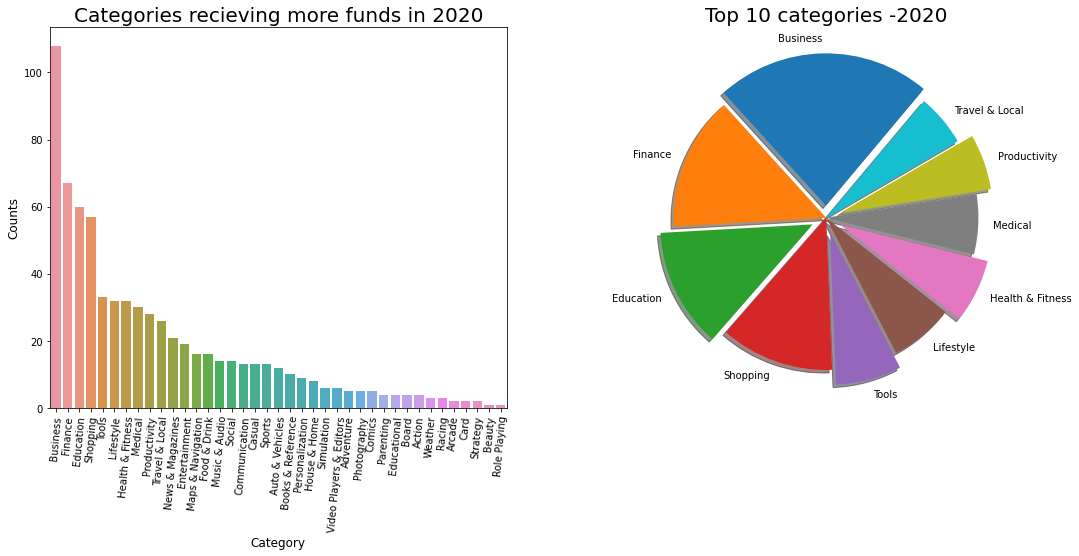

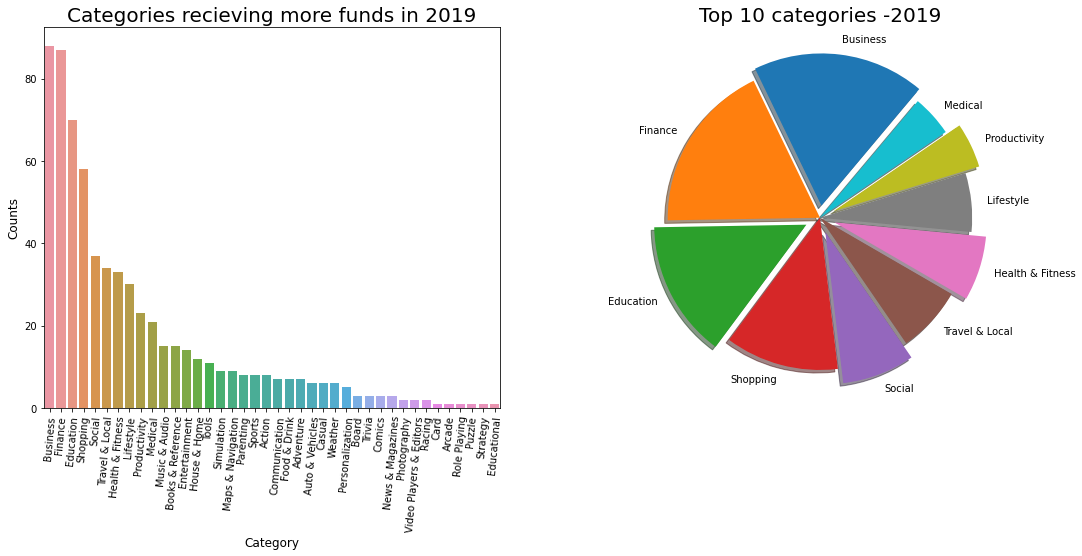

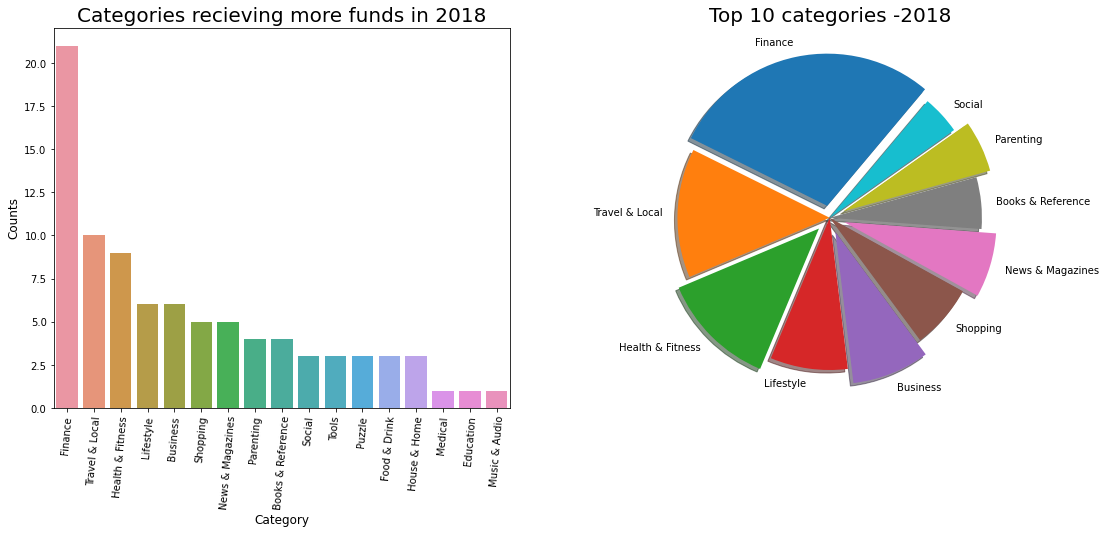

In [ ]:
# Trend of recieving funds over years for each category
years = Funded_df['observed year'].value_counts().index.to_list()

plt.rcParams['figure.figsize'] = (18, 7)
for i in years:
  plt.figure()
  temp = Funded_df[Funded_df['observed year']==i]
  a = pd.DataFrame(temp['Application Category'].value_counts())
  ax1 = plt.subplot(121)
  sns.barplot(x=a.index, y= a['Application Category'] )
  plt.xlabel('Category', fontsize = 12)
  plt.xticks(rotation=85)
  plt.ylabel('Counts', fontsize = 12)
  ax1.set_title('Categories recieving more funds in '+str(i), fontsize = 20)

  ax2 = plt.subplot(122)
  explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
  plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
  ax2.set_title('Top 10 categories -'+str(i), fontsize = 20) 

In [ ]:
# Numerical variables
numerical = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

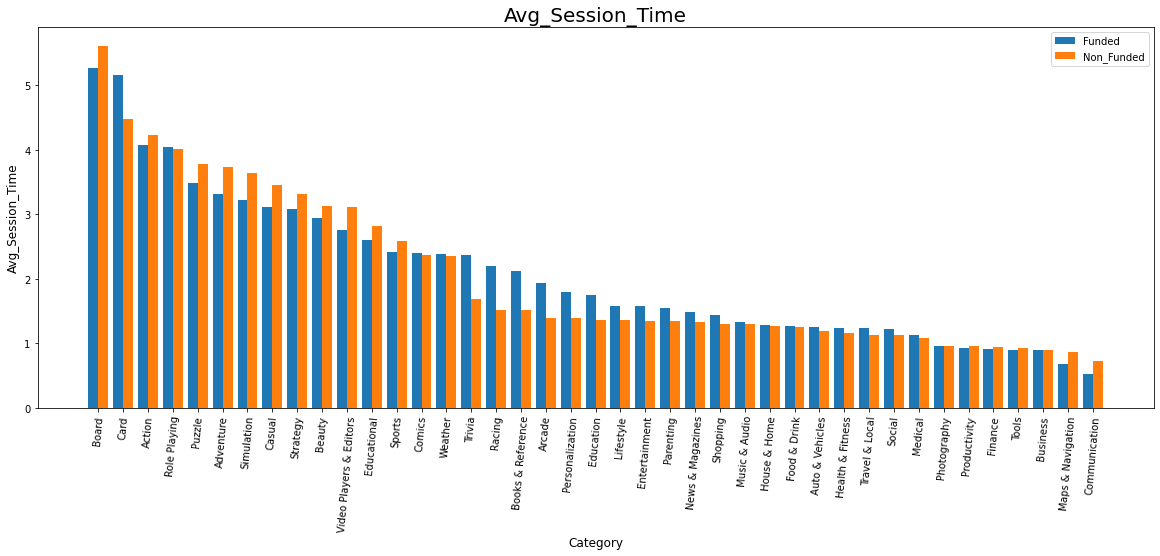

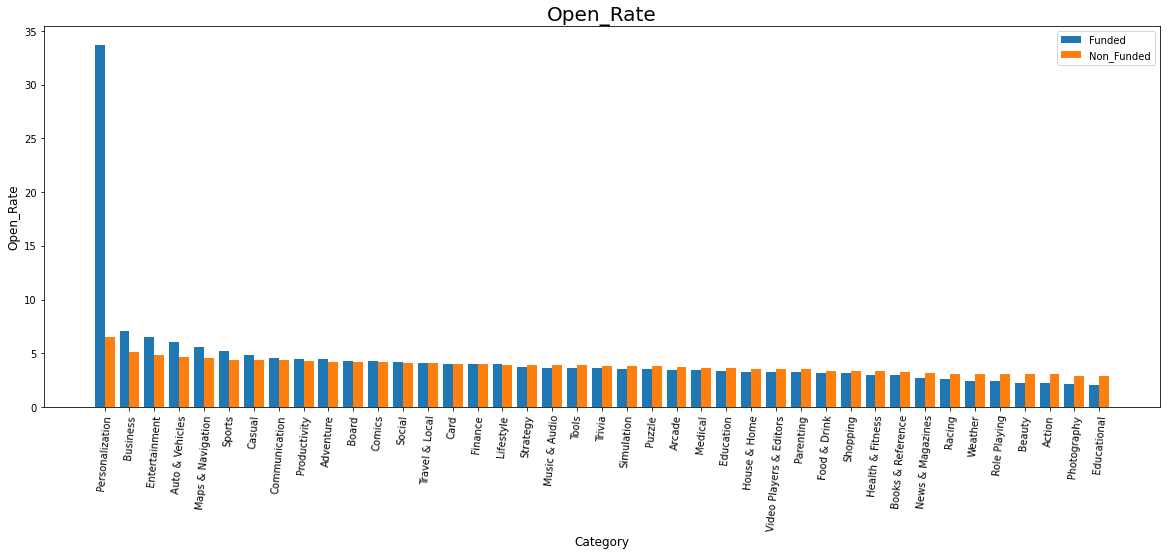

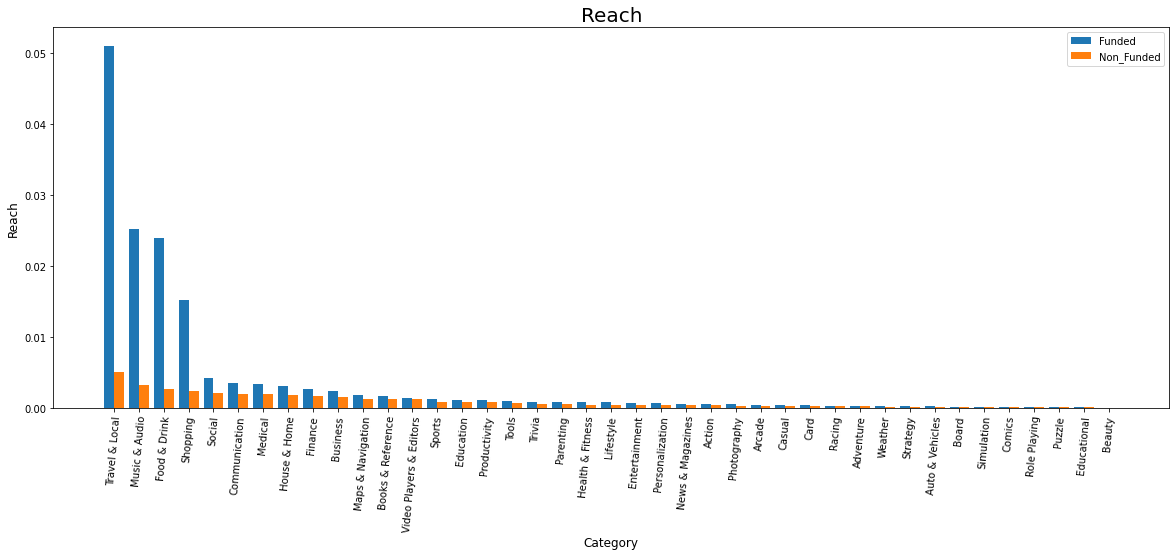

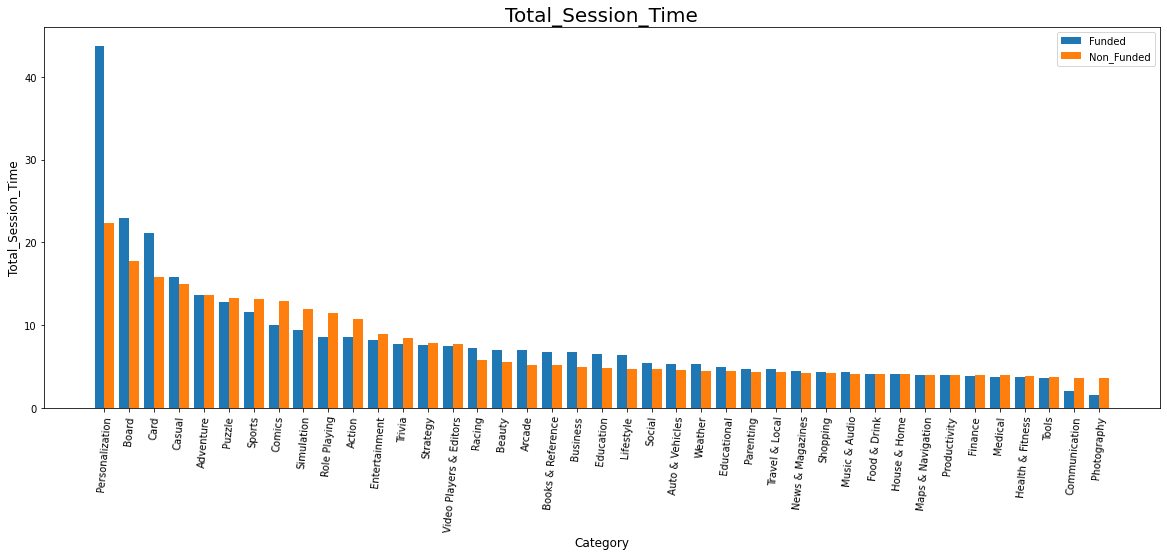

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
for i in numerical:
  w=0.4
  temp = pd.DataFrame(Funded_df.groupby(['Application Category'])[i].mean())
  temp = temp.sort_values([i], ascending=False)
  temp2 = pd.DataFrame(Non_funded_df.groupby(['Application Category'])[i].mean())
  temp2 = temp2.sort_values([i], ascending=False)
  # for j in not_funded_cat:
  #   temp2.drop(j, inplace = True)

  bar1 = np.arange(len(temp.index))
  bar2 = [i+w for i in bar1]

  plt.bar(bar1, temp[i], w, label = 'Funded' )
  plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

  plt.xlabel('Category', fontsize = 12)
  plt.xticks(bar1+w/2, temp.index, rotation=85)
  plt.ylabel(i, fontsize = 12)
  plt.title(i, fontsize = 20)
  plt.legend()
  plt.show()

Not Funded in 2020 - ['Trivia', 'Puzzle']


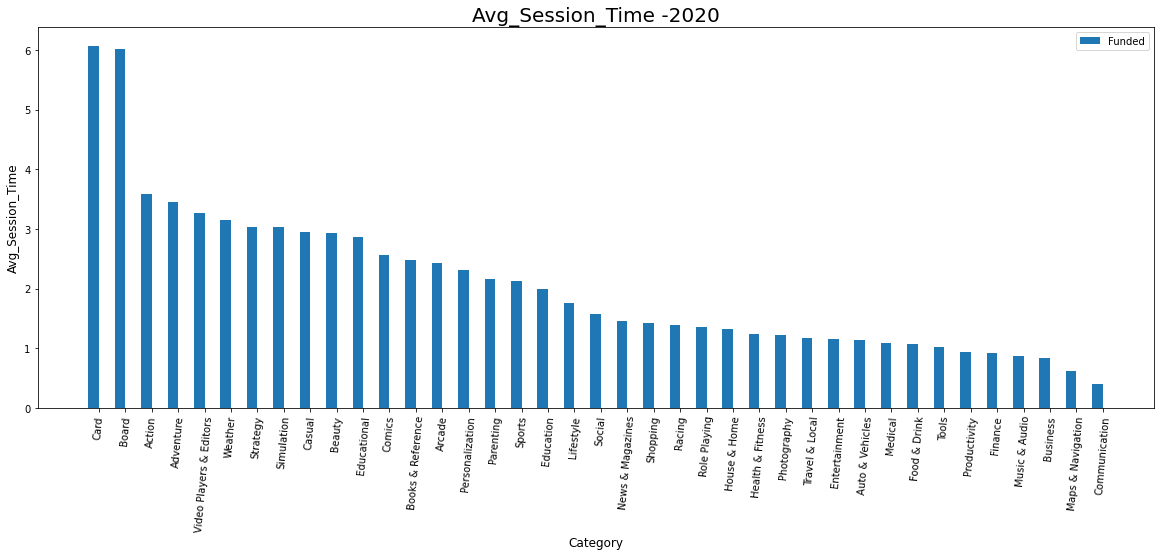

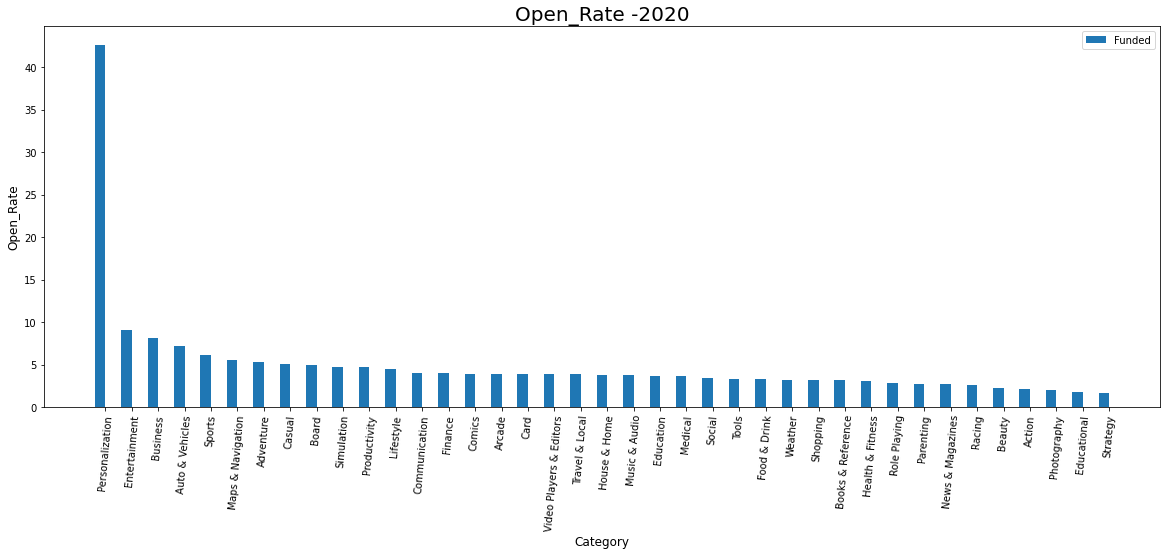

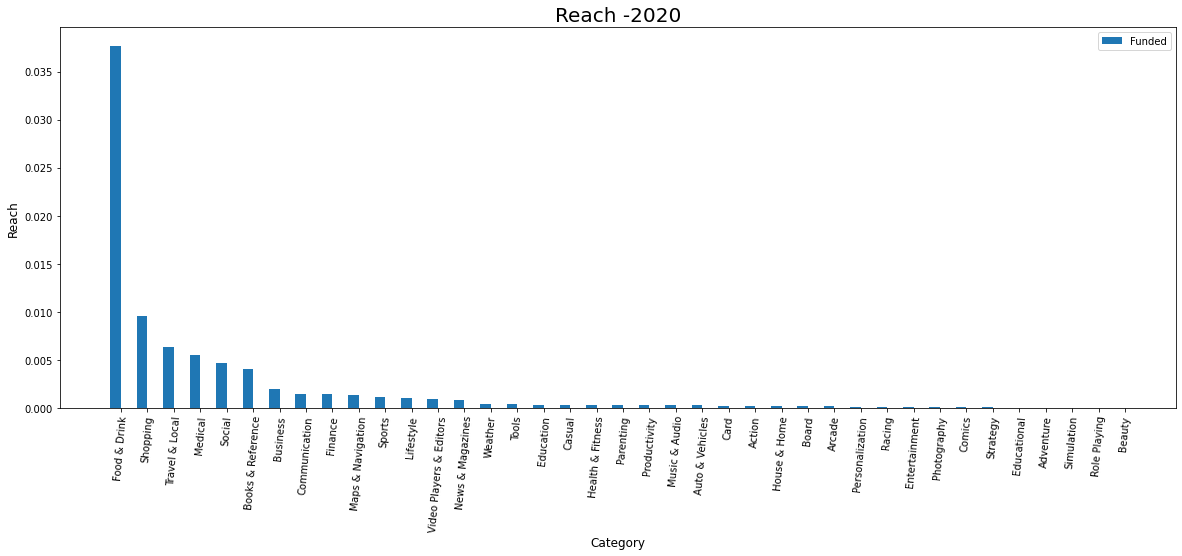

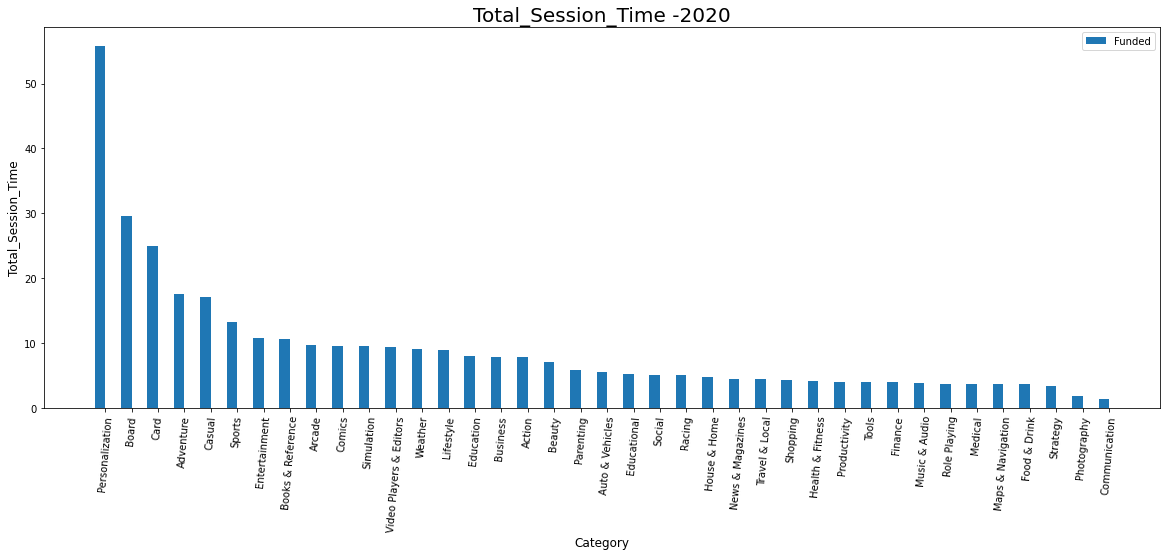

Not Funded in 2019 - ['Beauty']


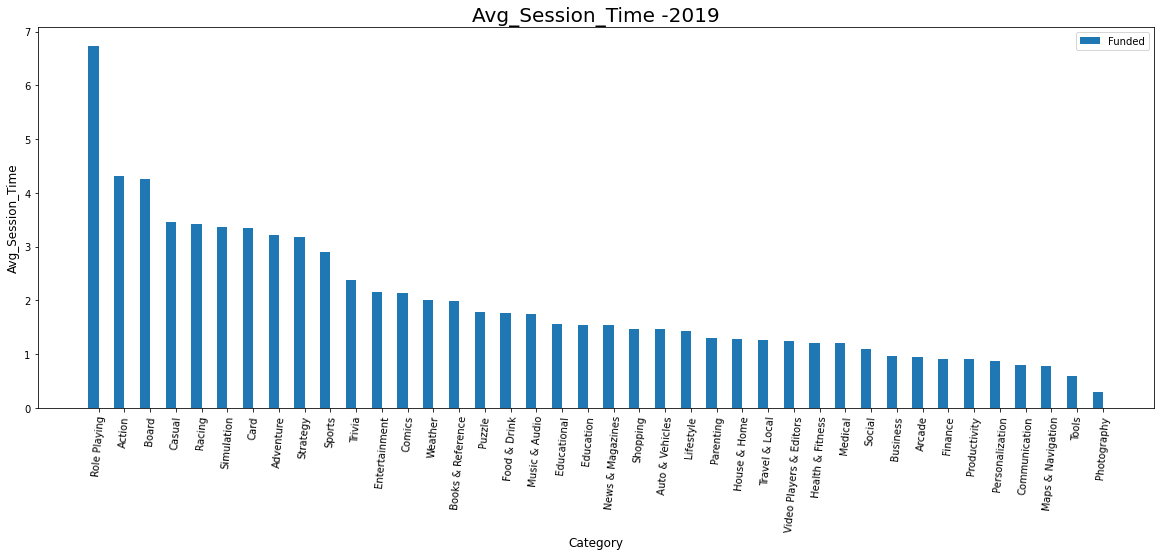

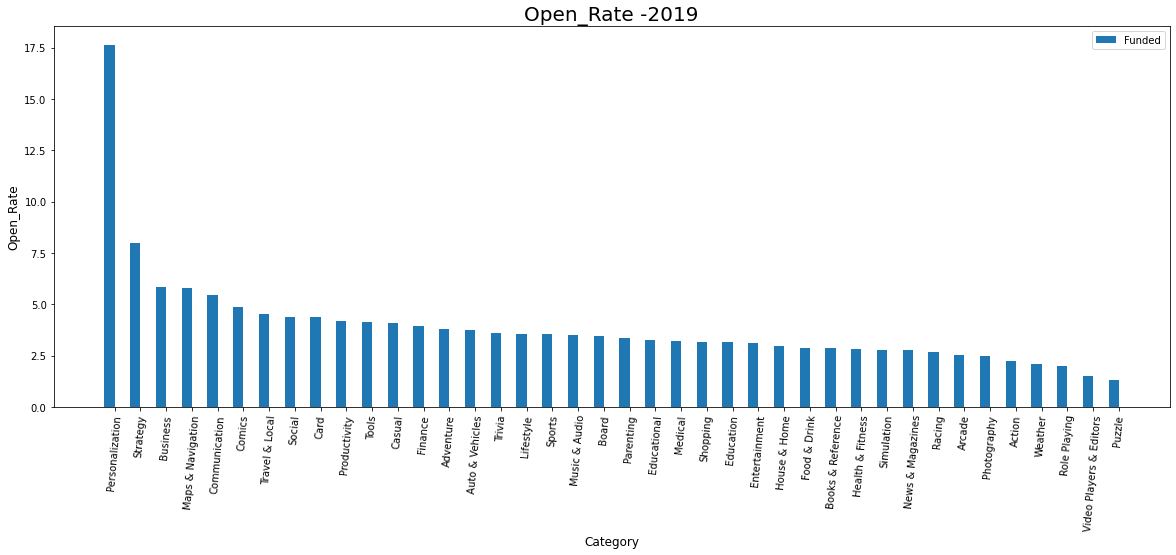

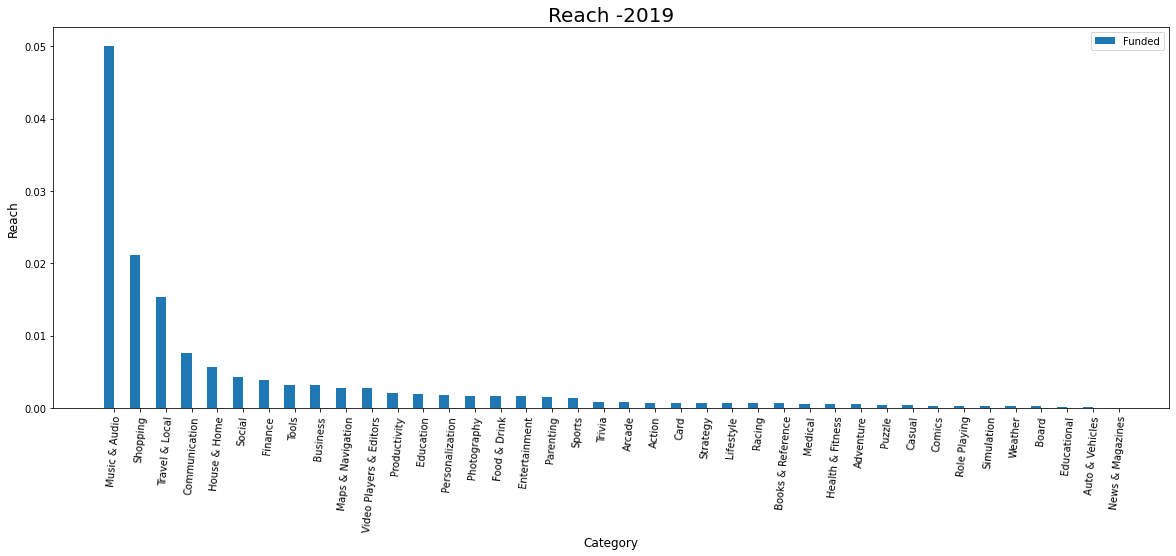

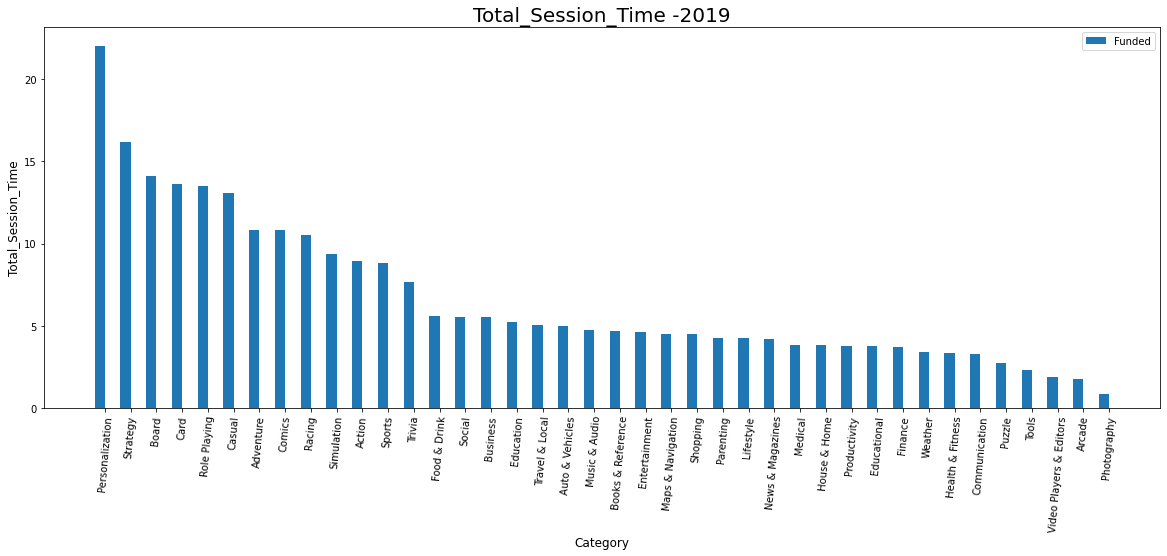

Not Funded in 2018 - ['Entertainment', 'Casual', 'Photography', 'Productivity', 'Board', 'Arcade', 'Comics', 'Educational', 'Video Players & Editors', 'Weather', 'Beauty', 'Sports', 'Personalization', 'Simulation', 'Action', 'Auto & Vehicles', 'Maps & Navigation', 'Communication', 'Role Playing', 'Card', 'Adventure', 'Trivia', 'Strategy', 'Racing']


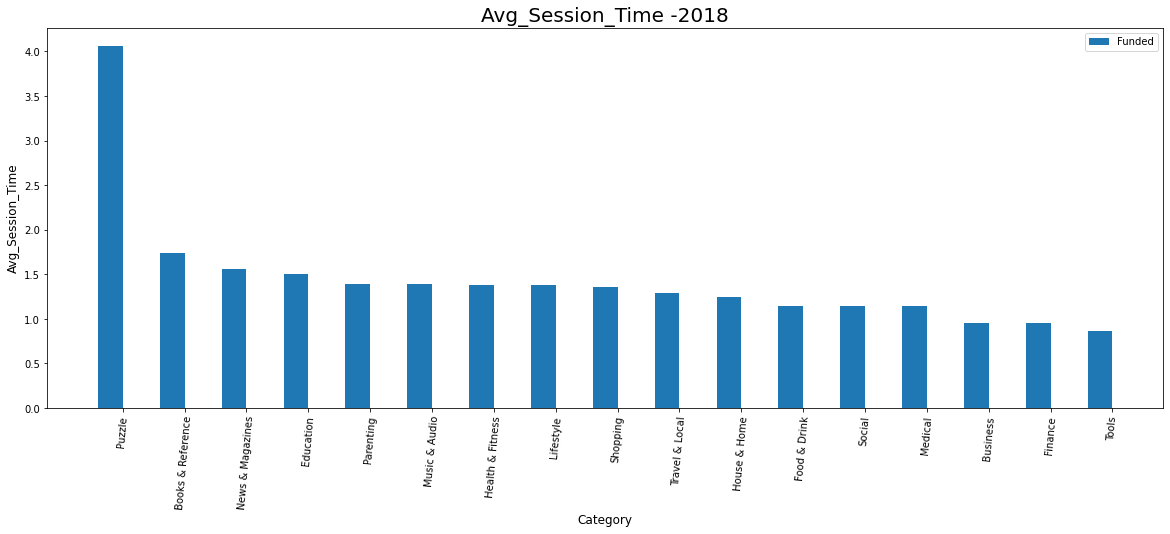

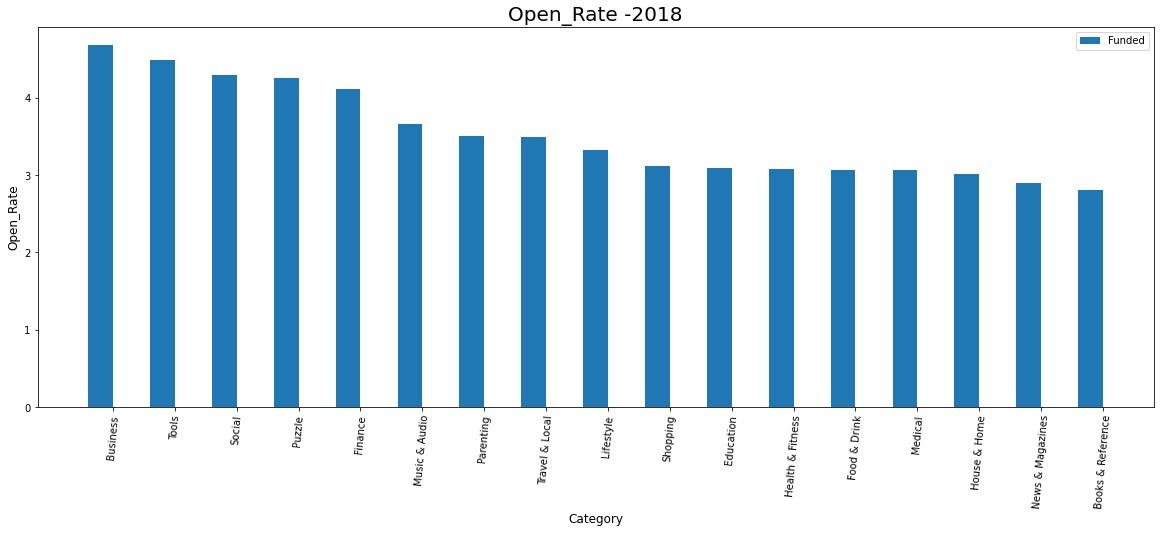

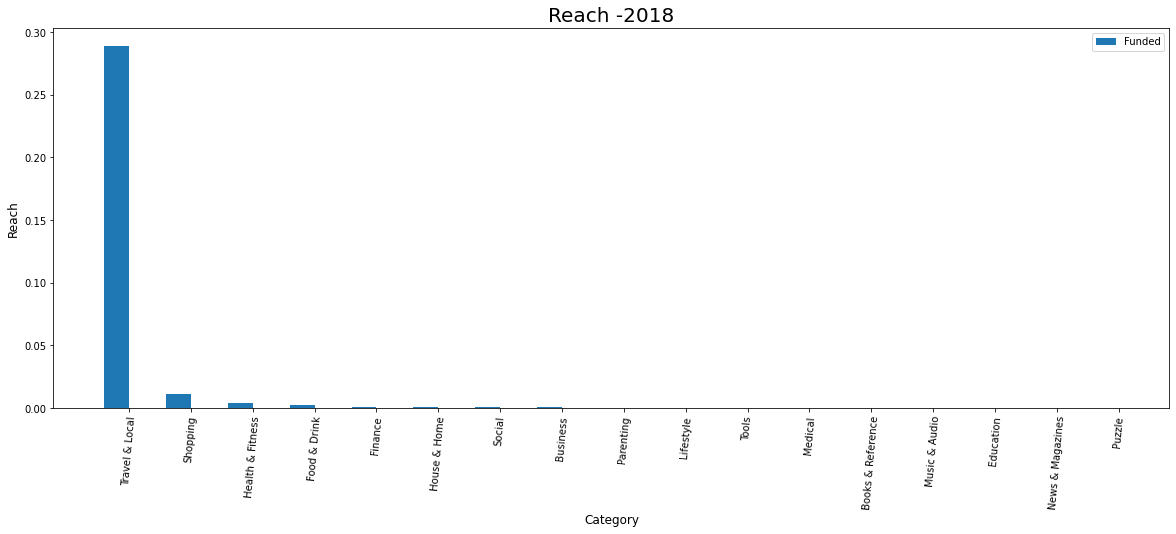

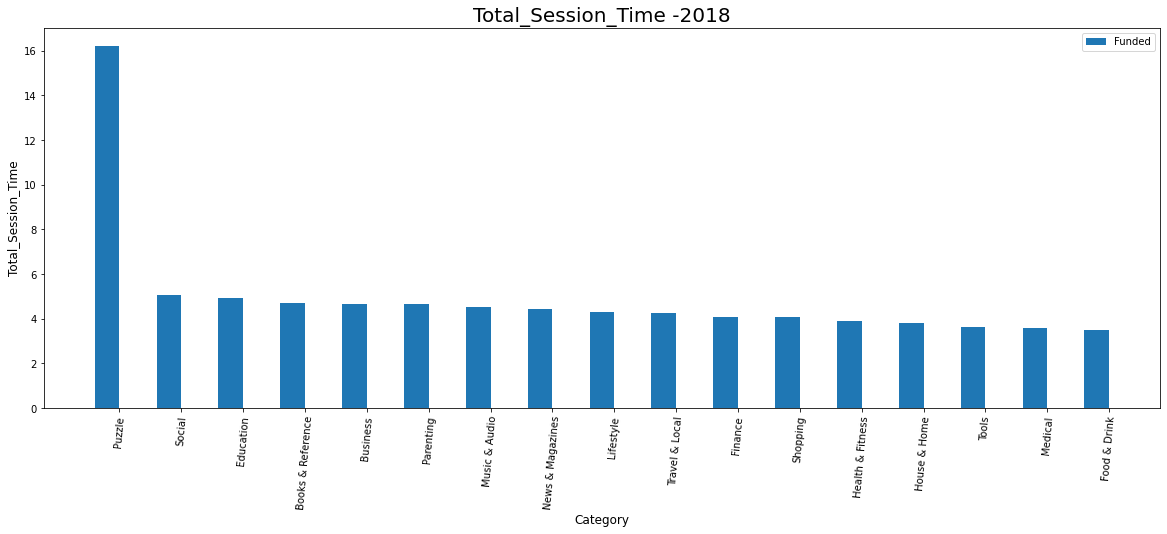

In [ ]:
# Trend for each category year wise
plt.rcParams['figure.figsize'] = (20, 7)

years = Funded_df['observed year'].value_counts().index.to_list()
for j in years:
  a1 = Funded_df[Funded_df['observed year']==j]
  a2 = Non_funded_df[Non_funded_df['observed year']==j]
  not_funded = list(set(a2['Application Category'].value_counts().index.to_list()) - set(a1['Application Category'].value_counts().index.to_list()))
  print('Not Funded in '+str(j)+' -',not_funded)
  for i in numerical:
    w=0.4
    temp = pd.DataFrame(a1.groupby(['Application Category'])[i].mean())
    temp = temp.sort_values([i], ascending=False)
    temp2 = pd.DataFrame(a2.groupby(['Application Category'])[i].mean())
    temp2 = temp2.sort_values([i], ascending=False)
    # for k in not_funded:
    #   temp2.drop(k, inplace = True)

    bar1 = np.arange(len(temp.index))
    bar2 = [i+w for i in bar1]

    plt.bar(bar1, temp[i], w, label = 'Funded' )
    # plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

    plt.xlabel('Category', fontsize = 12)
    plt.xticks(bar1+w/2, temp.index, rotation=85)
    plt.ylabel(i, fontsize = 12)
    plt.title(i +' -'+ str(j), fontsize = 20)
    plt.legend()
    plt.show() 

### **Understanding `Funding_ind`**

0    1409302
1       2554
Name: funding_ind, dtype: int64


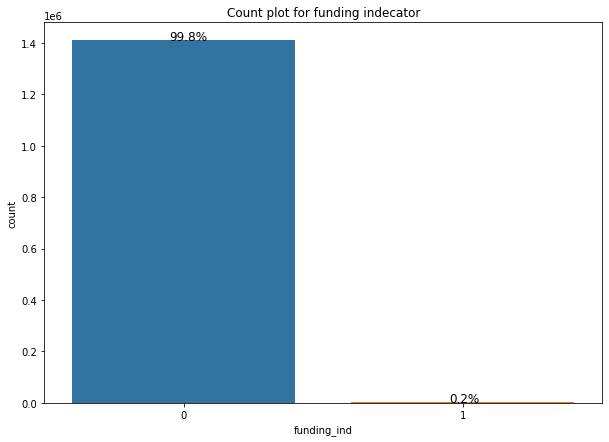

In [ ]:
print(cleaned_df['funding_ind'].value_counts())
fig, ax = plt.subplots(figsize =(10, 7)) 
ax = sns.countplot(x=cleaned_df['funding_ind'])
plt.title("Count plot for funding indecator")
perc_on_bar(ax,cleaned_df["funding_ind"])

* *The dataset lookes highly imbalanced*

### **understanding `month`**

In [ ]:
clf_df.month.unique()

array([20180801, 20190601, 20191201, 20200301, 20190201, 20200201,
       20190301, 20200601, 20180901, 20190701, 20181201, 20190801,
       20190901, 20180701, 20181001, 20181101, 20191001, 20200101,
       20200501, 20190401, 20200401, 20190501, 20191101, 20190101])

In [ ]:
clf_df.month.describe()

count    1.411856e+06
mean     2.019699e+07
std      5.644440e+03
min      2.018070e+07
25%      2.019120e+07
50%      2.020030e+07
75%      2.020040e+07
max      2.020060e+07
Name: month, dtype: float64

In [ ]:
clf_df['month'].apply(lambda x: changeTodate(x)[2])

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
1502280    2019
1502281    2019
1502282    2019
1502283    2019
1502284    2019
Name: month, Length: 1411856, dtype: int64

In [ ]:
changeTodate(20180801)[0]

1

In [ ]:
clf_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed date,observed day,observed month,observed year
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,0.042963,NaN,0,2018-01-08,1,8,2018
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,0.003244,NaN,0,2018-01-08,1,8,2018
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,0.000161,NaN,0,2018-01-08,1,8,2018
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,0.000077,NaN,0,2018-01-08,1,8,2018
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,0.000939,NaN,0,2018-01-08,1,8,2018


In [ ]:
clf_df['Observed_year'] = clf

### **Understanding `Application category`**

In [ ]:
total_cat = cleaned_df['Application Category'].unique()
print(total_cat)
print(f'Length: {len(total_cat)}')

['Education' 'Tools' 'Business' 'Books & Reference' 'Entertainment'
 'Productivity' 'Finance' 'Photography' 'Personalization' 'Music & Audio'
 'Lifestyle' 'Social' 'Communication' 'Health & Fitness' 'Travel & Local'
 'Shopping' 'Simulation' 'News & Magazines' 'Casual' 'Action'
 'Video Players & Editors' 'Puzzle' 'Sports' 'Arcade' 'Medical'
 'Educational' 'Maps & Navigation' 'Racing' 'Food & Drink' 'Adventure'
 'Art & Design' 'Auto & Vehicles' 'Role Playing' 'Board' 'Card' 'Strategy'
 'Weather' 'House & Home' 'Word' 'Events' 'Dating' 'Trivia' 'Beauty'
 'Comics' 'Casino' 'Music' 'Parenting' 'Libraries & Demo']
Length: 48


In [ ]:
# Application categories that are funded
funded_cat = cleaned_df[cleaned_df['funding_ind']==1]['Application Category'].unique()
print(funded_cat)
print(f'Length: {len(funded_cat)}')


['Education' 'Tools' 'Business' 'Books & Reference' 'Entertainment'
 'Productivity' 'Finance' 'Photography' 'Personalization' 'Music & Audio'
 'Lifestyle' 'Social' 'Communication' 'Health & Fitness' 'Travel & Local'
 'Shopping' 'Simulation' 'News & Magazines' 'Casual' 'Action'
 'Video Players & Editors' 'Puzzle' 'Sports' 'Arcade' 'Medical'
 'Educational' 'Maps & Navigation' 'Racing' 'Food & Drink' 'Adventure'
 'Auto & Vehicles' 'Role Playing' 'Board' 'Card' 'Strategy' 'Weather'
 'House & Home' 'Trivia' 'Beauty' 'Comics' 'Parenting']
Length: 41


In [ ]:
# Application categories that are not funded so far
not_funded_cat =  [ele for ele in total_cat if ele not in funded_cat]
print(not_funded_cat) 
print(len(not_funded_cat))

['Art & Design', 'Word', 'Events', 'Dating', 'Casino', 'Music', 'Libraries & Demo']
7


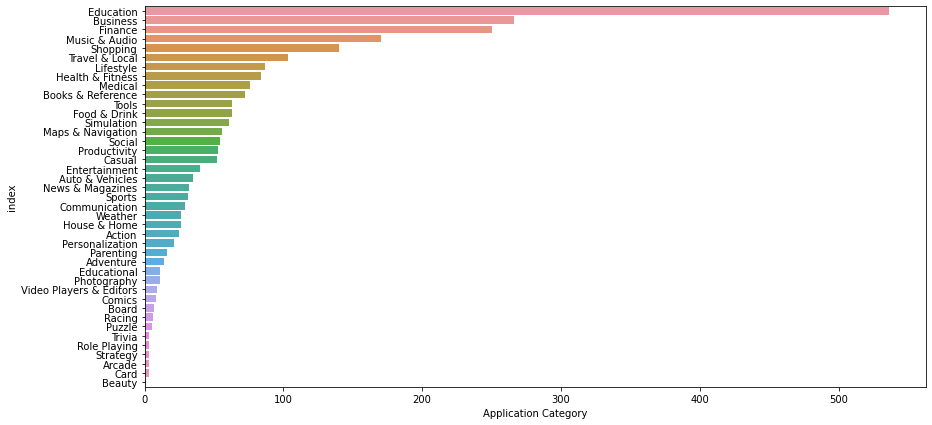

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x = 'Application Category',y = 'index',data =cleaned_df[cleaned_df['funding_ind']==1]['Application Category'].value_counts().reset_index())

In [ ]:
clf_df['Avg_Session_Time'].describe()

count    877097.000000
mean          1.623716
std           2.253572
min           0.000033
25%           0.417860
50%           0.890115
75%           1.917746
max          58.561333
Name: Avg_Session_Time, dtype: float64

In [ ]:
cleaned_df['Avg_Session_Time'].describe()

count    1.411856e+06
mean     1.567898e+00
std      2.003959e+00
min      3.333333e-05
25%      5.235612e-01
50%      9.778198e-01
75%      1.722726e+00
max      5.856133e+01
Name: Avg_Session_Time, dtype: float64

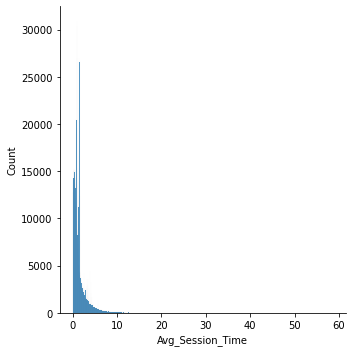

In [ ]:
sns.displot(cleaned_df['Avg_Session_Time'])

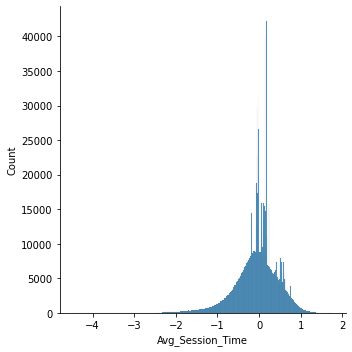

In [ ]:
sns.displot(np.log10(cleaned_df['Avg_Session_Time']))

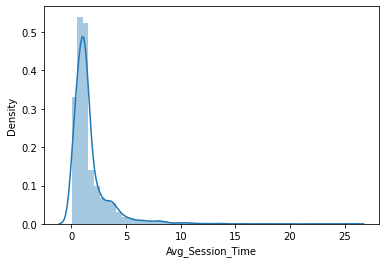

In [ ]:
sns.distplot(cleaned_df[cleaned_df['funding_ind']==1]['Avg_Session_Time'])

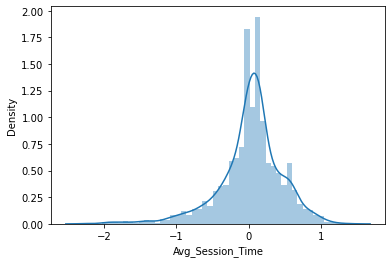

In [ ]:
sns.distplot(np.log10(cleaned_df[cleaned_df['funding_ind']==1]['Avg_Session_Time']))

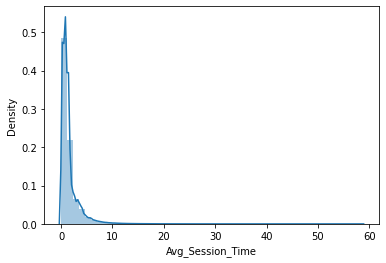

In [ ]:
sns.distplot(cleaned_df[cleaned_df['funding_ind']==0]['Avg_Session_Time'])

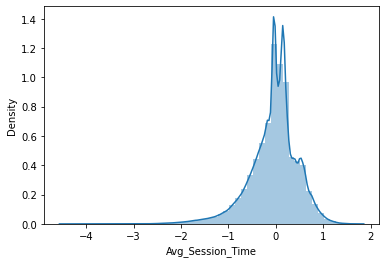

In [ ]:
sns.distplot(np.log10(cleaned_df[cleaned_df['funding_ind']==0]['Avg_Session_Time']))

In [ ]:
not_funded_cat

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1502280    False
 1502281    False
 1502282    False
 1502283    False
 1502284    False
 Name: Application Category, Length: 1411856, dtype: bool]

In [ ]:
clf_df.UUID.value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2654
a8febb4b767f83022235f3f34a2241ed1e13db2f    1670
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1529
ec1cd22193eda5ec91905247ea3079ae84e2dd30    1224
03fb932e41ef68f1df45e0b20f326de05ebd438c    1086
                                            ... 
664aa660b24bbfde19579838f56335913e8556e6       1
6101e98a205000be9ab068d95ebfc1fd0f32acf7       1
e839d4f917cd833b6273d33a06f4e354ac65fec1       1
8429682b40a3f6a30a46a091ca032f3c6402b7d2       1
75945505cc6e1858b38aede39e8ddc95f87ef78f       1
Name: UUID, Length: 147741, dtype: int64

### **Feature Engineering**

In [ ]:
# Taking only 1 category that has been funded most
a = pd.DataFrame(new_df[new_df['funding_ind']==1]['Application Category'].value_counts())
a = a.sort_values(['Application Category'], ascending=False)
category = a.index.to_list()
category


['Business',
 'Finance',
 'Education',
 'Shopping',
 'Health & Fitness',
 'Travel & Local',
 'Lifestyle',
 'Social',
 'Medical',
 'Productivity',
 'Tools',
 'Entertainment',
 'Music & Audio',
 'Books & Reference',
 'News & Magazines',
 'Food & Drink',
 'Maps & Navigation',
 'House & Home',
 'Sports',
 'Communication',
 'Casual',
 'Auto & Vehicles',
 'Parenting',
 'Simulation',
 'Personalization',
 'Action',
 'Adventure',
 'Weather',
 'Video Players & Editors',
 'Comics',
 'Board',
 'Photography',
 'Educational',
 'Racing',
 'Puzzle',
 'Trivia',
 'Arcade',
 'Card',
 'Strategy',
 'Role Playing',
 'Beauty']

In [ ]:
category_df = pd.DataFrame(columns = new_df.columns)
for i in category:
  temp = new_df[new_df['Application Category']==i]
  category_df = pd.concat([category_df, temp])

In [ ]:
category_df.shape

(790862, 10)

In [ ]:
folder_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/'

In [ ]:
category_df.to_csv(folder_path + 'category_file.csv',index=False)

In [ ]:
def Previous_Data(column, dataframe):
  new_data = pd.DataFrame(columns = dataframe.columns)
  Unique_id = dataframe['UUID'].value_counts().index.to_list()

  for i in Unique_id:
    #print(i)
    temp1 = dataframe[dataframe['UUID']==i]
    temp2 = dataframe[dataframe['UUID']==i][['UUID', 'month', column]]
    temp2 = temp2.sort_values(by=['month']) n
    temp2.set_index(['UUID', 'month'], inplace = True)
    temp2 = pd.DataFrame(temp2[column].shift(+1))
    temp2.fillna(temp2.mean(), inplace = True)
    temp2.rename(columns={column:column+'_Prev1'}, inplace=True)
    temp2.reset_index(inplace=True)
    temp2.drop(['UUID'], axis = 1, inplace=True)
    new_df = pd.merge(temp1, temp2, on = 'month', how='left')
    new_data = pd.concat([new_data, new_df])
  return new_data

In [ ]:
for i in numerical:
  # print(i)
  category_df = Previous_Data(i, category_df)

KeyboardInterrupt: ignored

In [4]:
prepared_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Latest_Final_df.csv')

In [5]:
prepared_data.head()

,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
0,Social,0,0.696084,1.129897,0.000193,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
1,Medical,0,0.566857,1.245098,0.000141,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
2,Entertainment,0,0.701096,2.788406,0.001244,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0
3,Music & Audio,0,1.156437,5.199642,0.001015,5.945193,0,-0.081981,-0.009780,-0.210673,-0.092419,-2.187268,-0.759350,-0.002365,-0.001100,-2.762546e-03,0.317650,-1.932151,-1.150282,0.0,73.170732,21.0
4,Tools,0,0.561742,5.279142,0.001634,2.835840,0,0.125983,0.564501,0.650406,-0.116786,2.551803,-2.976204,-0.000073,0.001201,-1.659055e-03,0.466265,5.152284,0.261623,0.0,114.634146,5.0


In [7]:
prepared_data.shape

(112431, 22)

In [8]:
prepared_data.funding_ind.value_counts()

0    111852
1       579
Name: funding_ind, dtype: int64

In [12]:
new_df = pd.get_dummies(prepared_data.drop('funding_ind',axis=1),columns = ['Application Category'])

In [13]:
new_df.head()

,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months,Application Category_Action,Application Category_Adventure,Application Category_Arcade,Application Category_Auto & Vehicles,Application Category_Beauty,Application Category_Board,Application Category_Books & Reference,Application Category_Business,Application Category_Card,Application Category_Casual,Application Category_Comics,Application Category_Communication,Application Category_Education,Application Category_Educational,Application Category_Entertainment,Application Category_Finance,Application Category_Food & Drink,Application Category_Health & Fitness,Application Category_House & Home,Application Category_Lifestyle,Application Category_Maps & Navigation,Application Category_Medical,Application Category_Music & Audio,Application Category_News & Magazines,Application Category_Parenting,Application Category_Personalization,Application Category_Photography,Application Category_Productivity,Application Category_Puzzle,Application Category_Racing,Application Category_Role Playing,Application Category_Shopping,Application Category_Simulation,Application Category_Social,Application Category_Sports,Application Category_Strategy,Application Category_Tools,Application Category_Travel & Local,Application Category_Trivia,Application Category_Video Players & Editors,Application Category_Weather
0,0.696084,1.129897,0.000193,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.566857,1.245098,0.000141,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.701096,2.788406,0.001244,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.156437,5.199642,0.001015,5.945193,0,-0.081981,-0.009780,-0.210673,-0.092419,-2.187268,-0.759350,-0.002365,-0.001100,-2.762546e-03,0.317650,-1.932151,-1.150282,0.0,73.170732,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.561742,5.279142,0.001634,2.835840,0,0.125983,0.564501,0.650406,-0.116786,2.551803,-2.976204,-0.000073,0.001201,-1.659055e-03,0.466265,5.152284,0.261623,0.0,114.634146,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Scalling the feature

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# final_df_scaled = pd.DataFrame(mms.fit_transform(prepared_data.drop('Funded',axis=1).values),columns=prepared_data.drop('Funded',axis=1).columns)

In [14]:
final_df_scaled  = new_df.copy()

In [ ]:
# final_df_scaled['y'] = prepared_data['Funded']
# final_df_scaled =final_df_scaled[~final_df_scaled.isin([np.nan, np.inf, -np.inf]).any(1)]

### Over Sampling using SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(final_df_scaled.drop(['Funded'],axis=1).values,final_df_scaled['Funded'].values)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

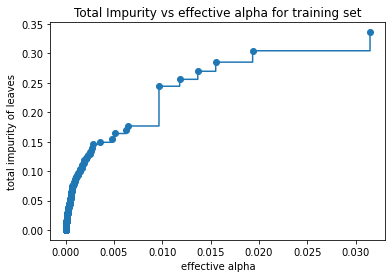

In [45]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### **Accuracy vs alpha for training and testing sets**

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### **Gradient Boosting Classifier**

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
from sklearn.metrics import *
# function to find the metrics for classifiers
def find_metrics(model_name,model,X_train,X_test,y_train,y_test):
  models = {'model': [],'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1_score': [],
            'train_tn fp fn tp': [], 'train_auc_roc': [], 'test_accuracy': [], 'test_precision': [],
            'test_recall': [], 'test_f1_score': [], 'test_tn fp fn tp': [], 'test_auc_roc': []}
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  models['train_accuracy'].append(accuracy_score(y_train,y_pred_train))
  models['train_precision'].append(precision_score(y_train,y_pred_train))
  models['train_recall'].append(recall_score(y_train,y_pred_train))
  models['train_f1_score'].append(f1_score(y_train,y_pred_train))
  models['train_tn fp fn tp'].append(confusion_matrix(y_train,y_pred_train).flatten())
  models['train_auc_roc'].append(roc_auc_score(y_train,y_pred_train))
  models['test_accuracy'].append(accuracy_score(y_test,y_pred_test))
  models['test_precision'].append(precision_score(y_test,y_pred_test))
  models['test_recall'].append(recall_score(y_test,y_pred_test))
  models['test_f1_score'].append(f1_score(y_test,y_pred_test))
  models['test_tn fp fn tp'].append(confusion_matrix(y_test,y_pred_test).flatten())
  models['test_auc_roc'].append(roc_auc_score(y_test,y_pred_test))
  models['model'].append(model_name)
  return pd.DataFrame(models)


In [19]:
find_metrics("GBM",model,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,GBM,0.946289,0.965973,0.925049,0.945068,"[86942, 2922, 6721, 82951]",0.946267,0.946618,0.966034,0.926258,0.945728,"[21612, 734, 1662, 20876]",0.946705


### Cost complexity pruning

In [43]:
clf = GradientBoostingClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

AttributeError: ignored

### **XGboost Classifier**

In [22]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20  # The number of training iterations

In [34]:
from xgboost import XGBClassifier

In [28]:
# data_dmatrix = xgb.DMatrix(data=X,label=y)

In [24]:
# D_train = xgb.DMatrix(X_train, label=y_train)
# D_test = xgb.DMatrix(X_test, label=y_test)

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [40]:
xgb_clf = xgb.XGBClassifier(n_estimators=100)

In [41]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
find_metrics("XGB",xgb_clf,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,XGB,0.94156,0.959718,0.921681,0.940315,"[86395, 3469, 7023, 82649]",0.941539,0.94214,0.960552,0.922664,0.941227,"[21492, 854, 1743, 20795]",0.942223
